Generating visualizations for paper...

1. Creating overall performance comparison...


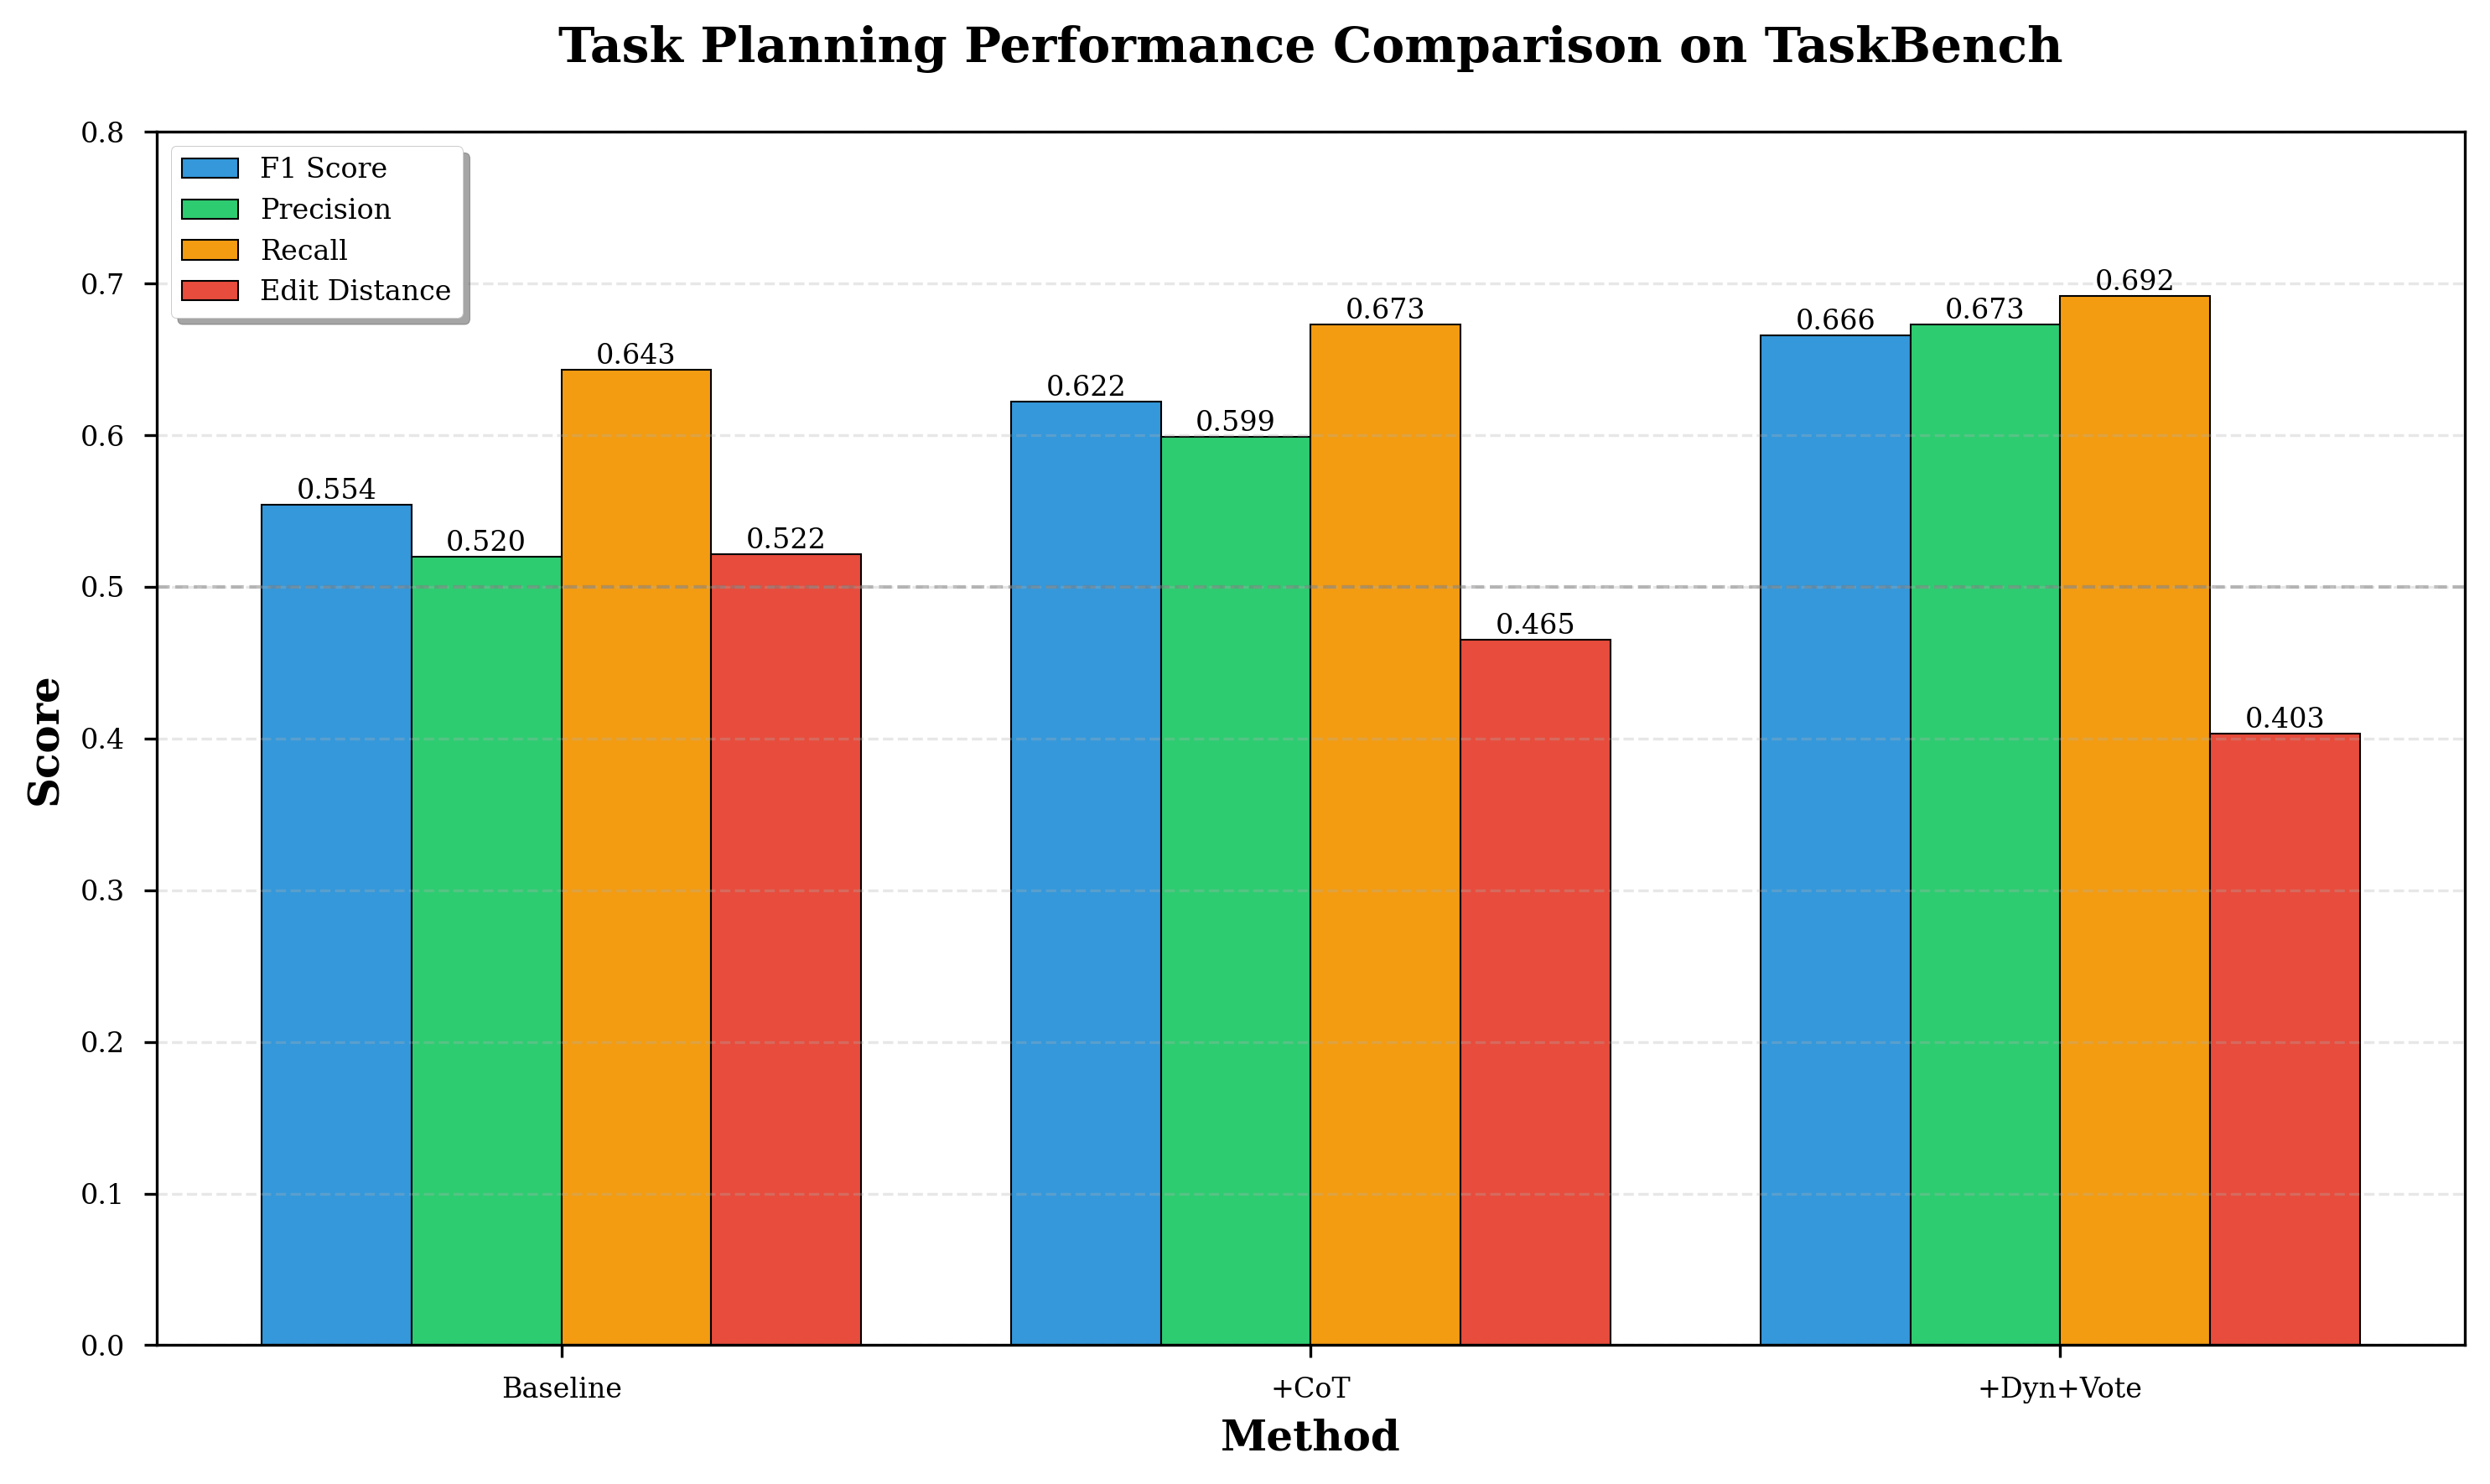


2. Creating complexity analysis...


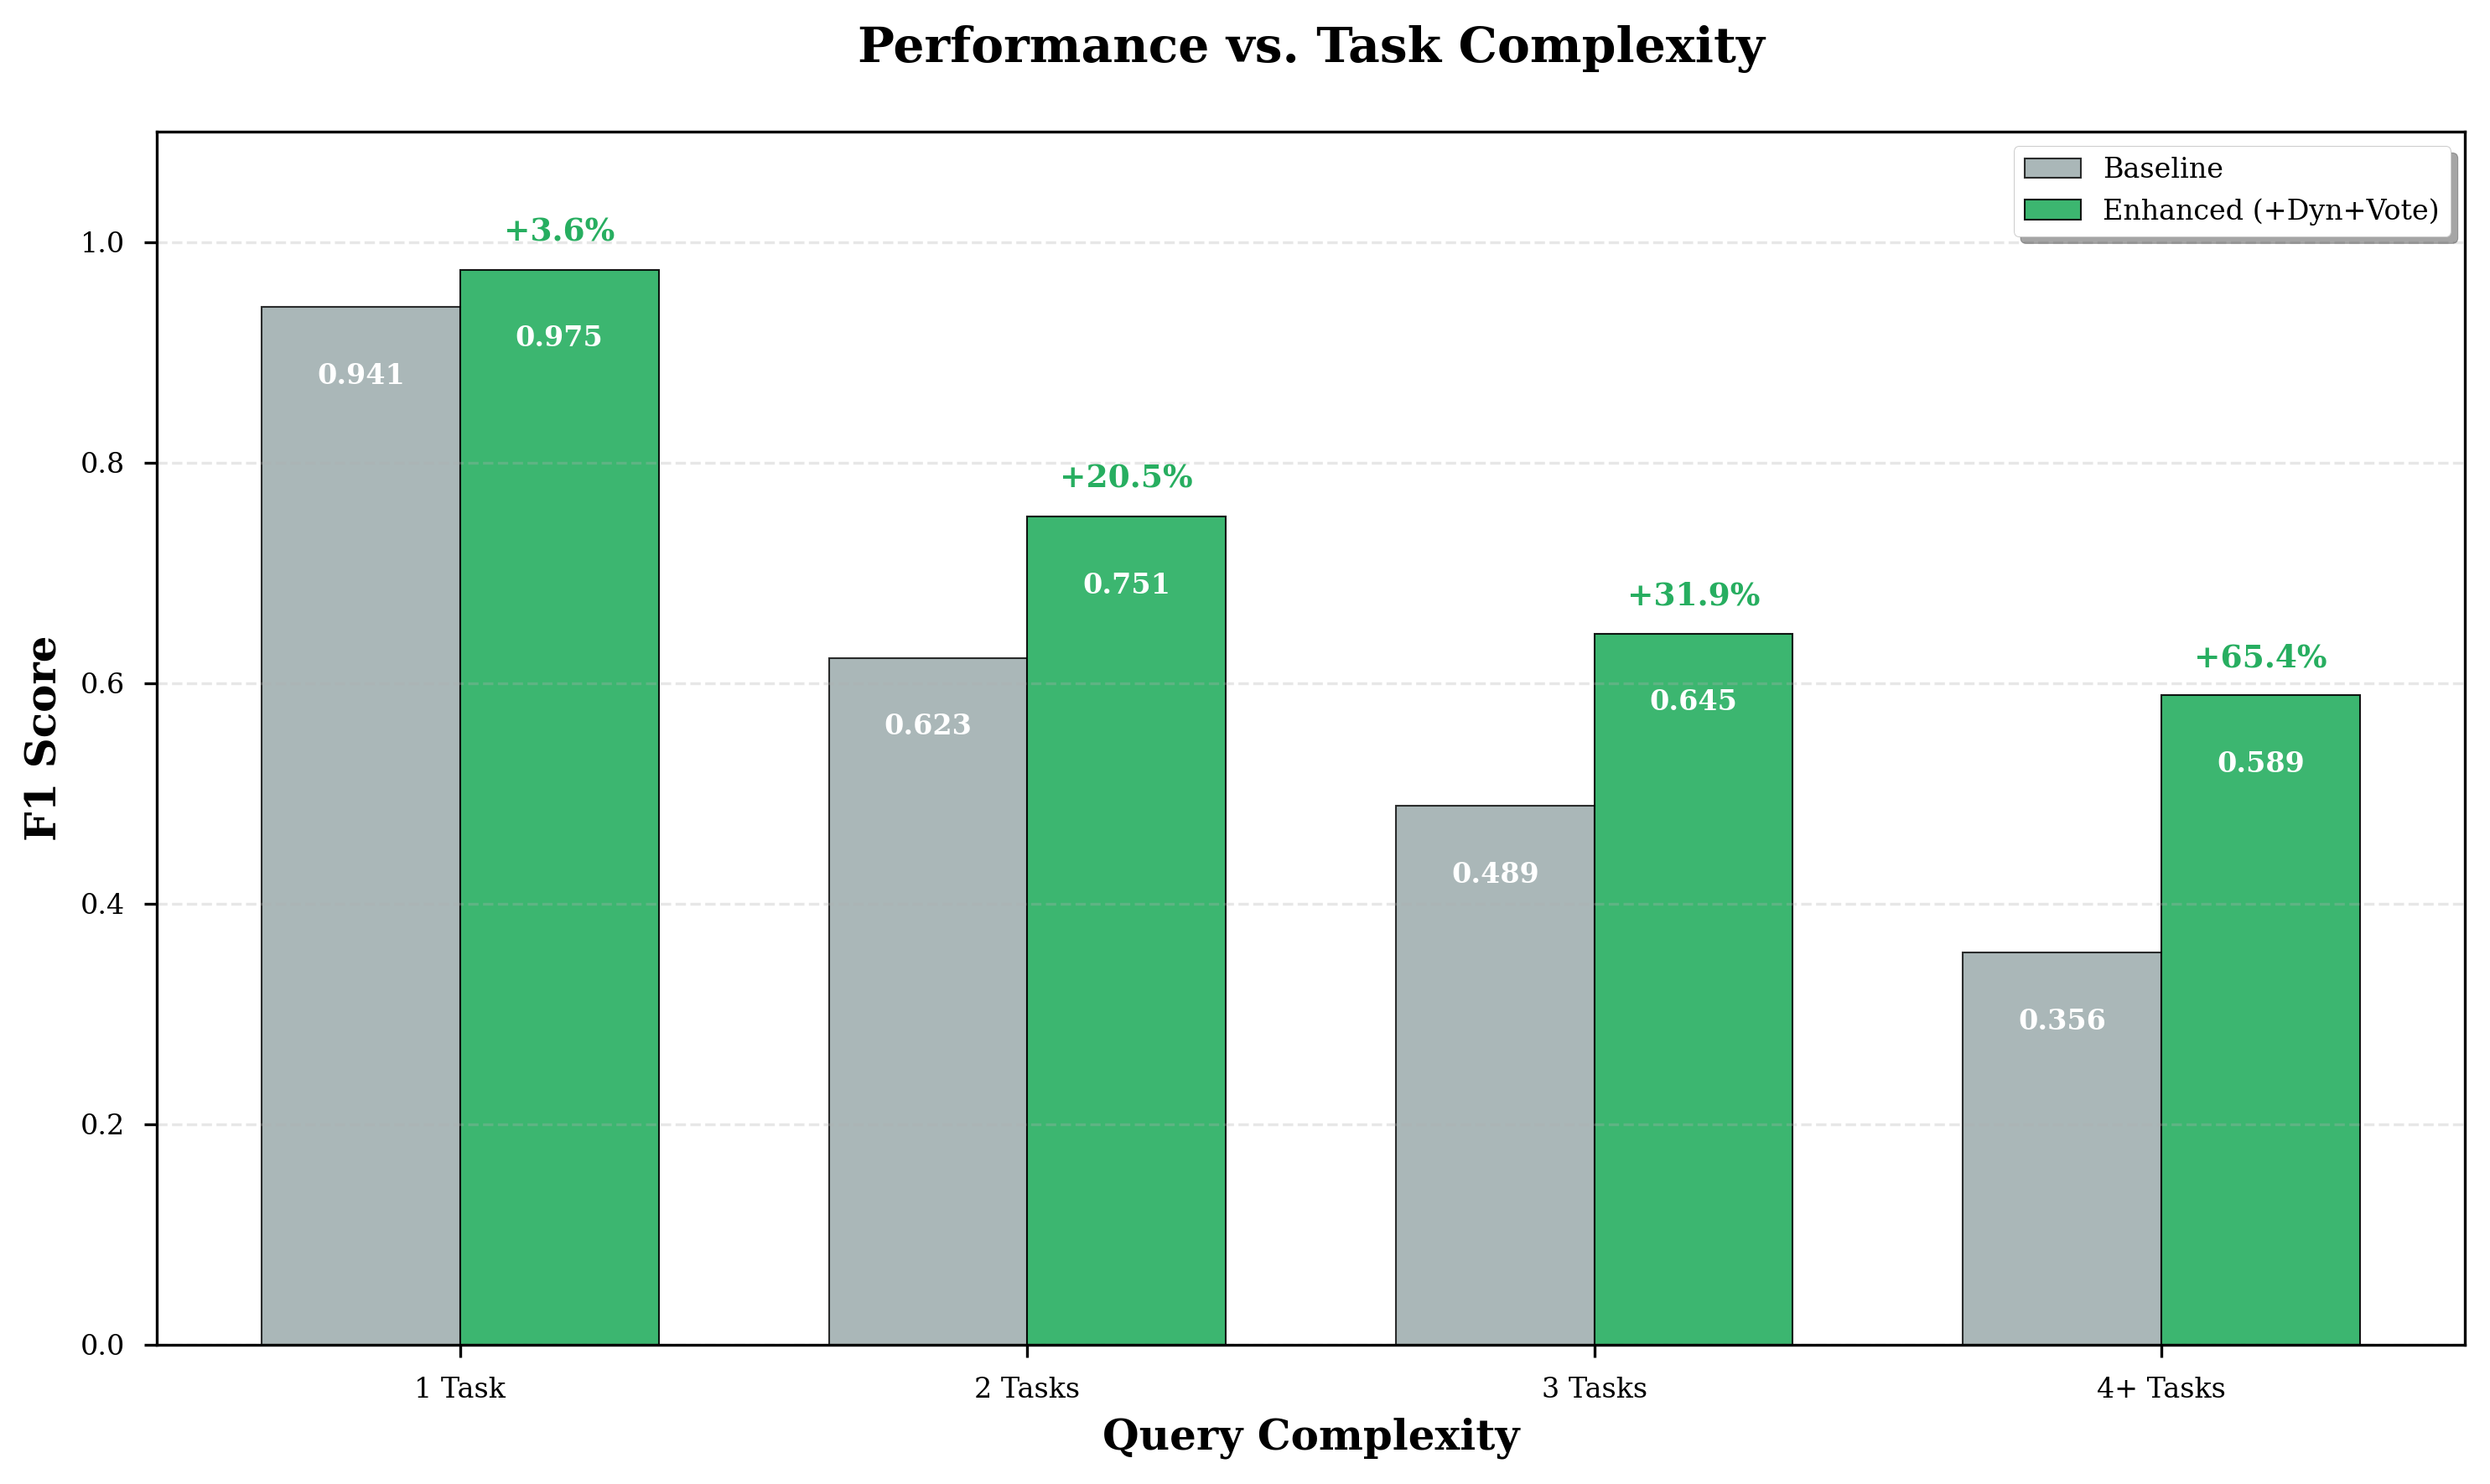


3. Creating category performance comparison...


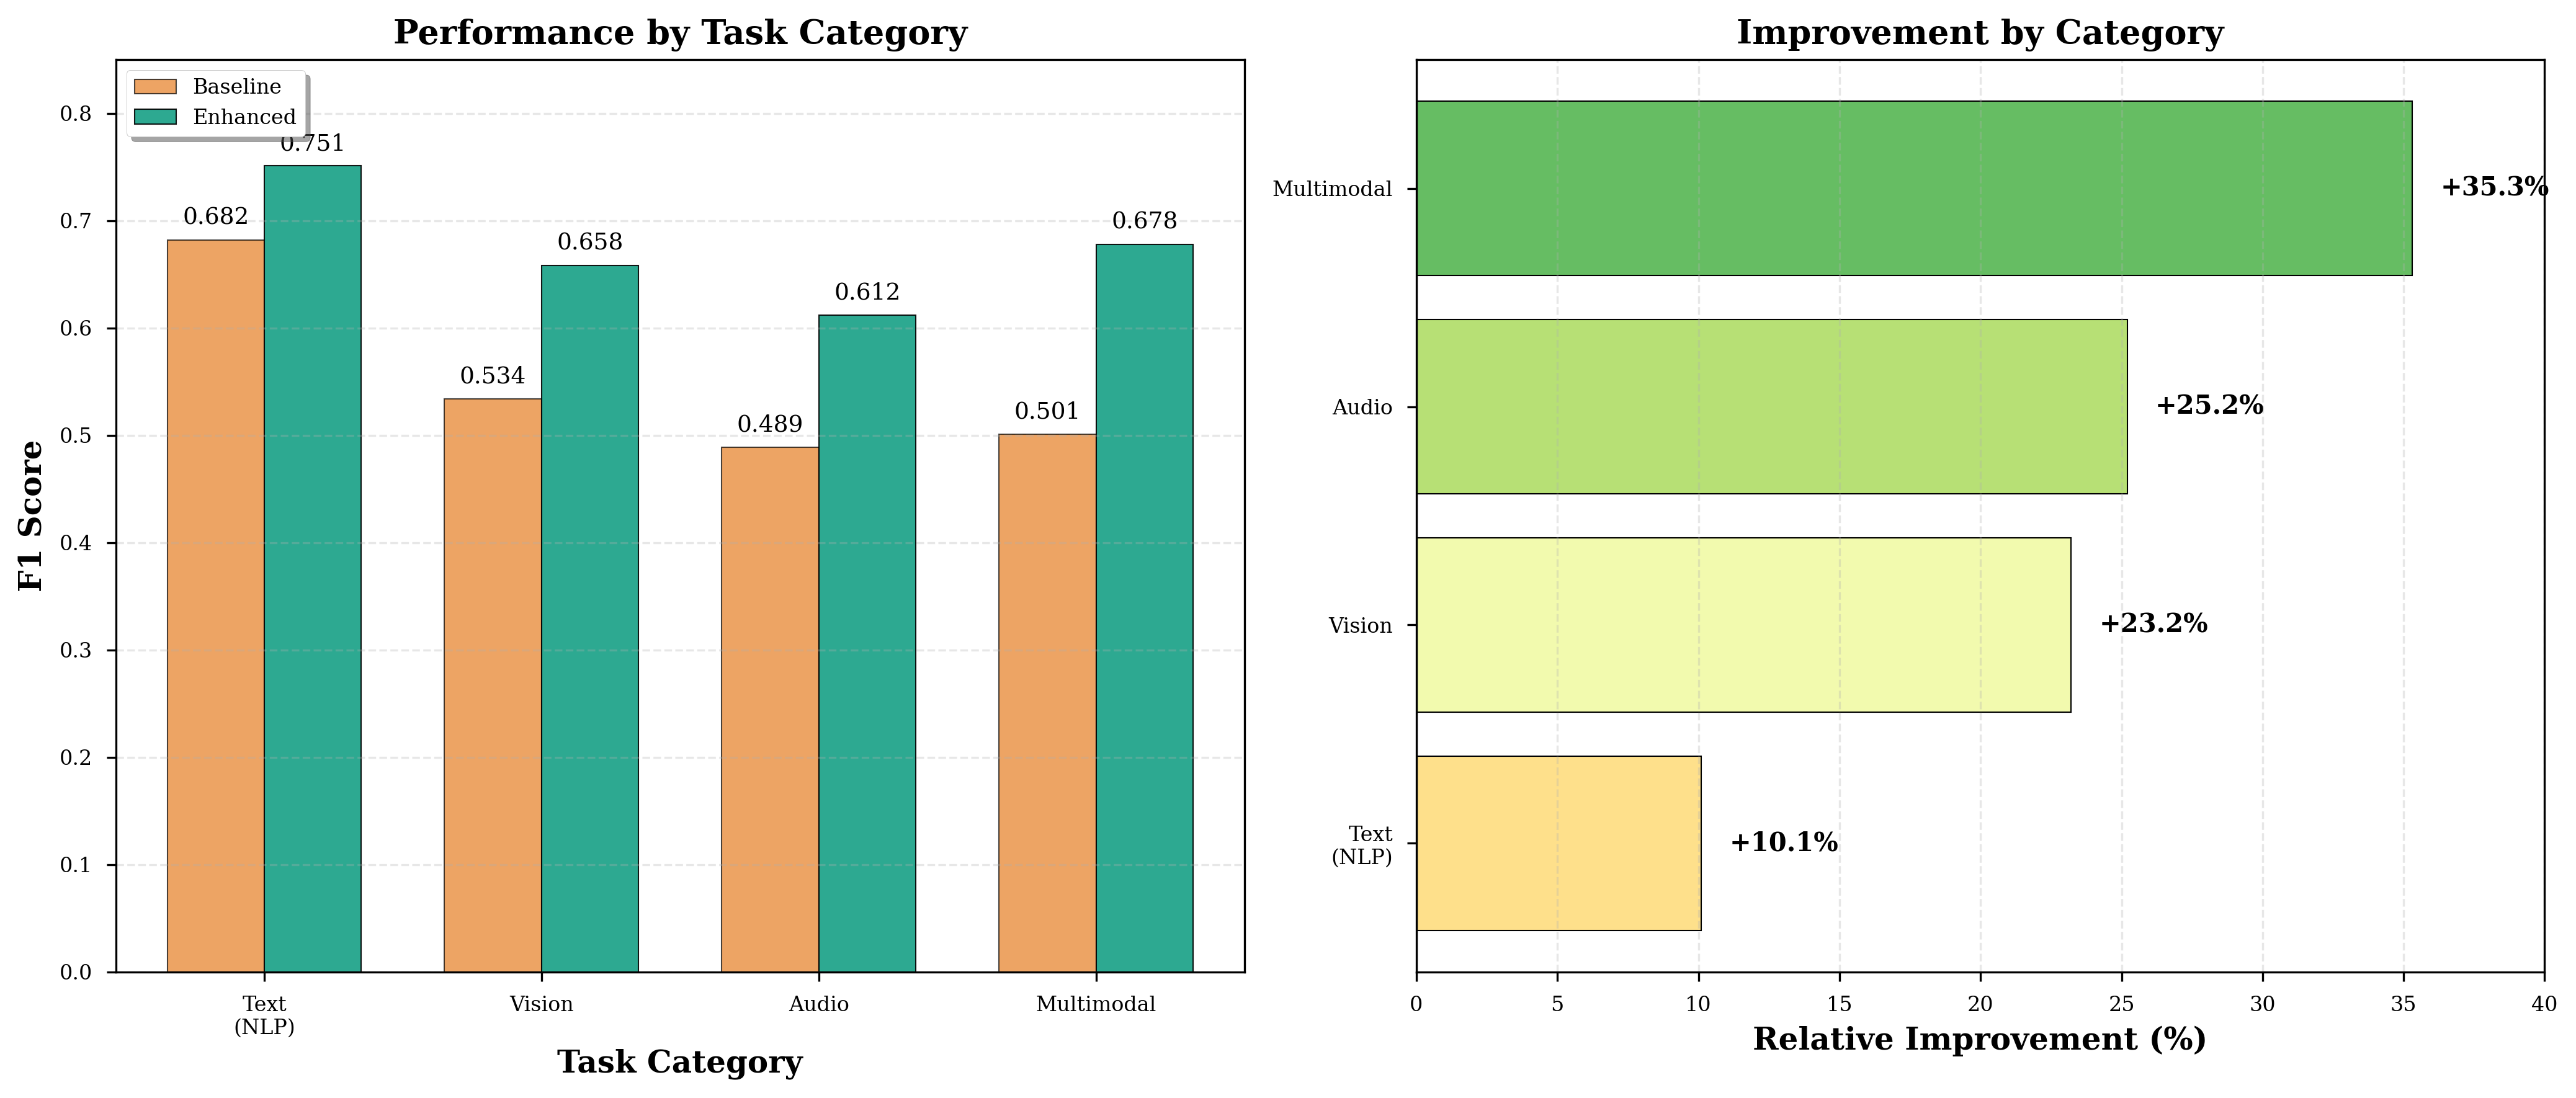


4. Creating ablation study visualization...


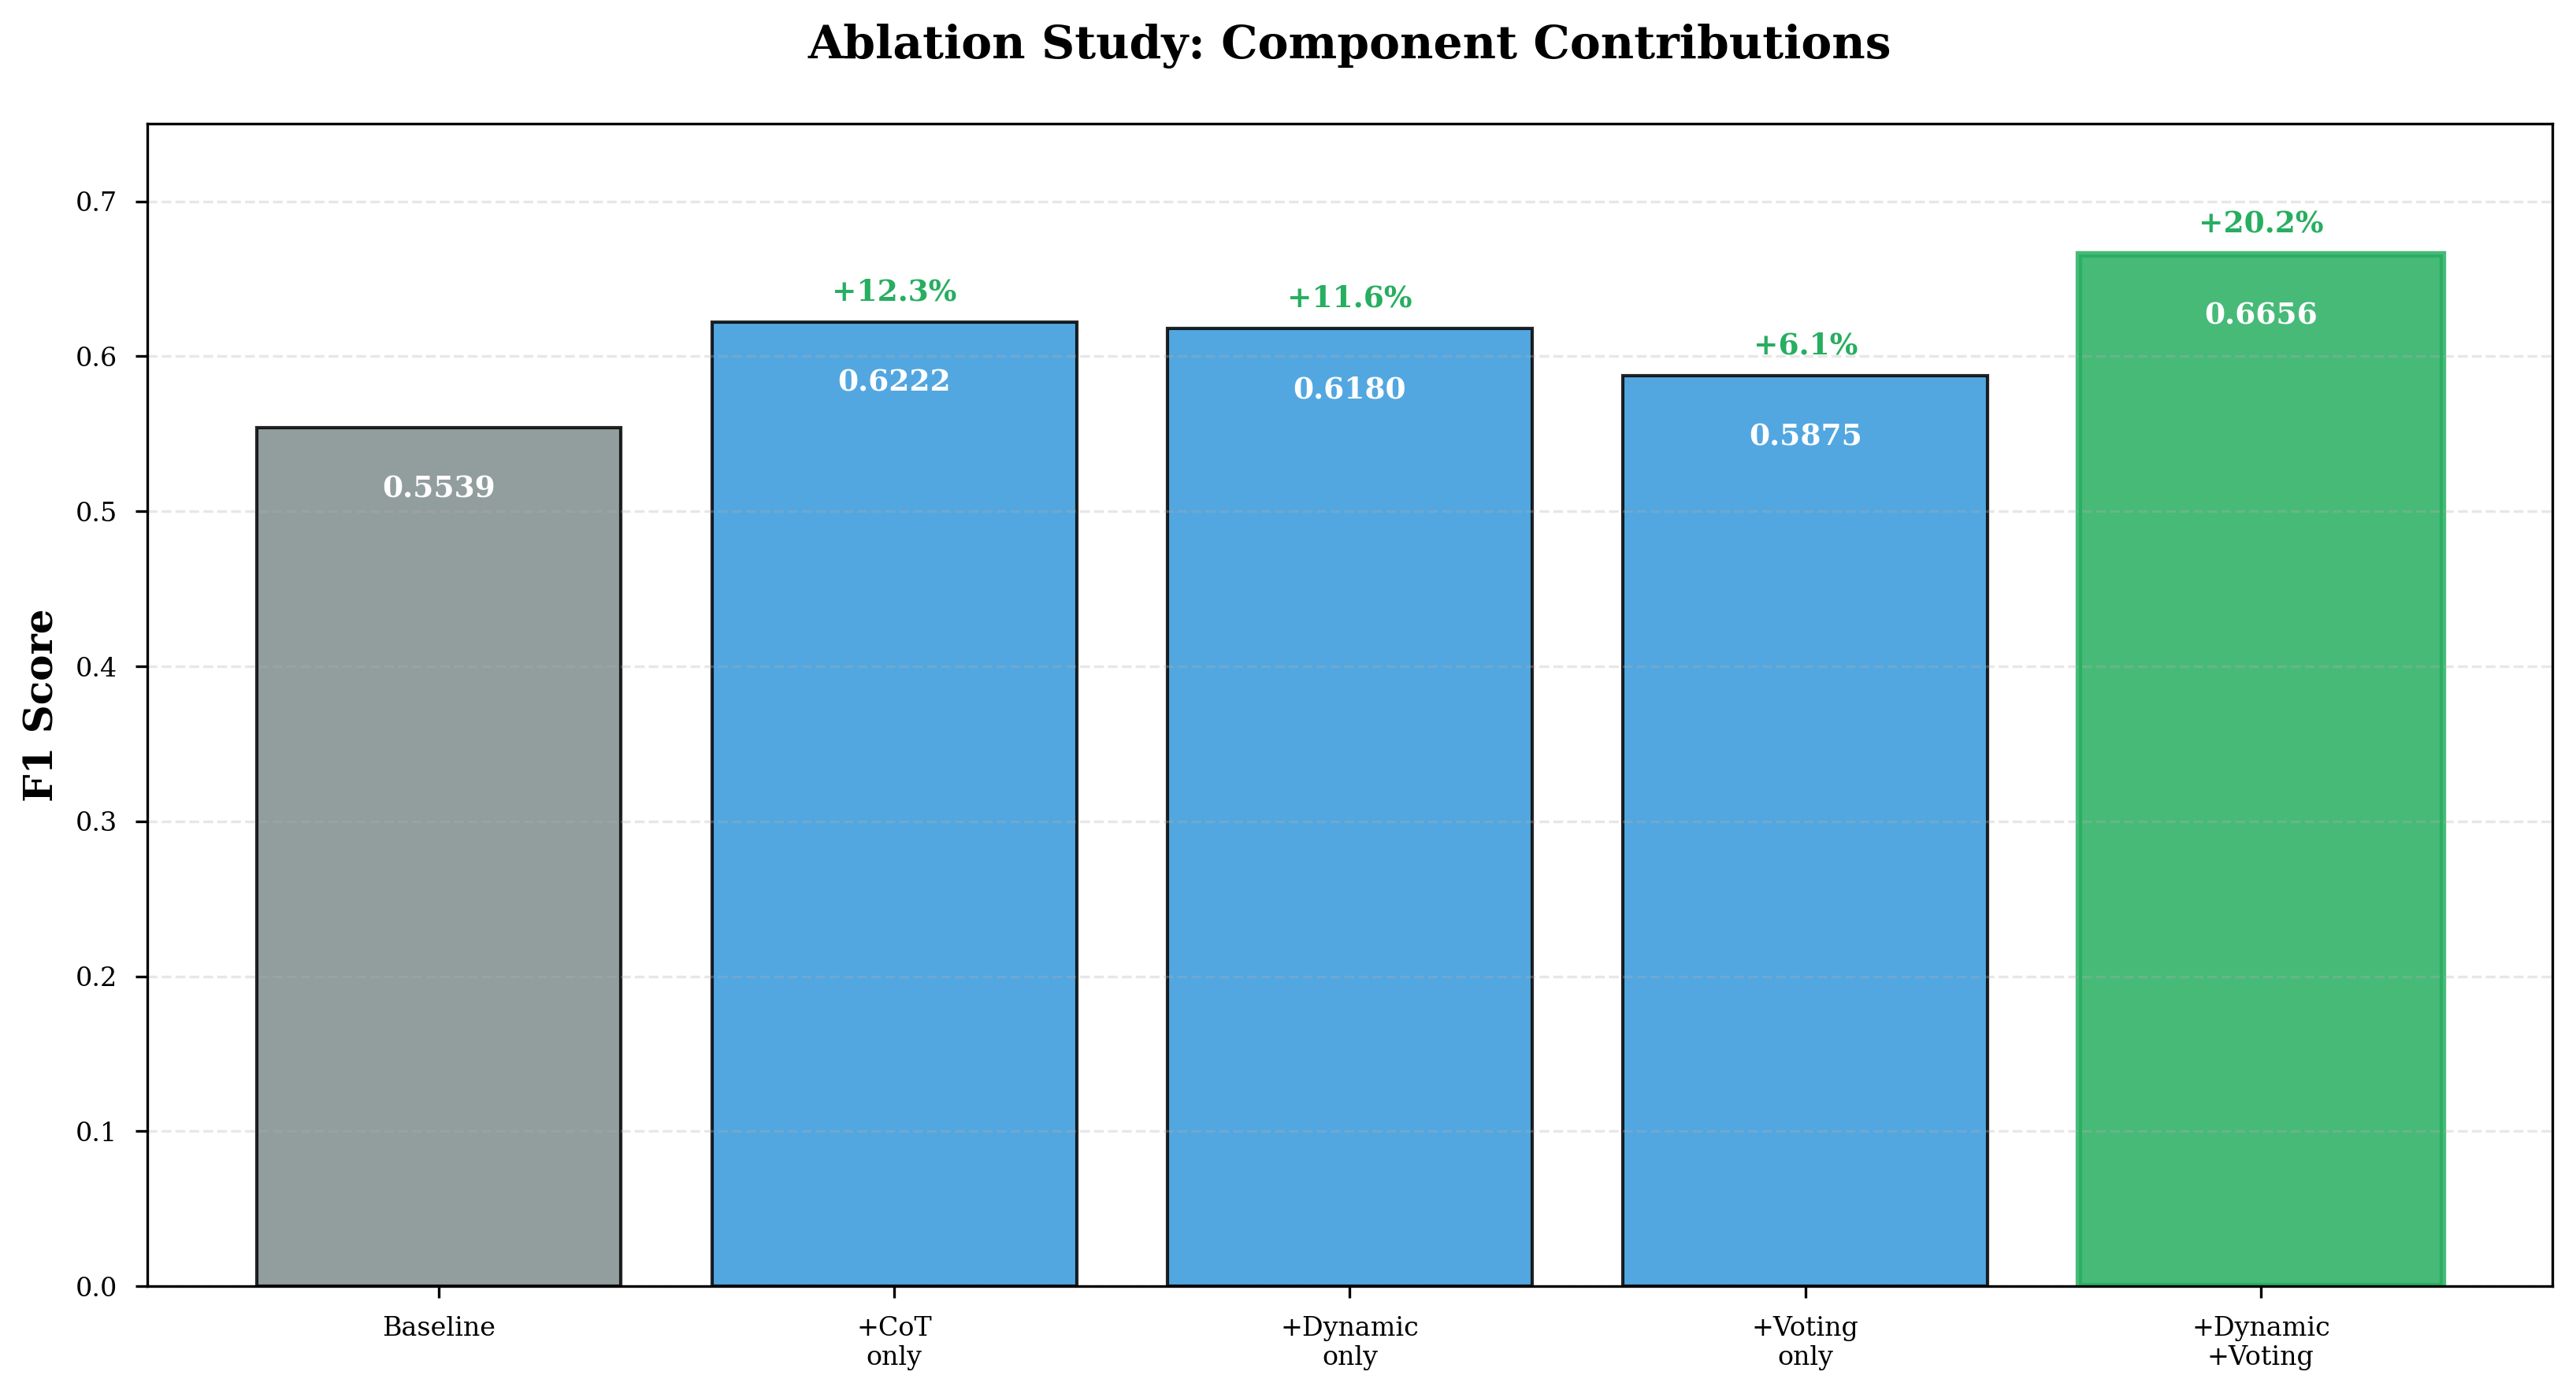


5. Creating error analysis...


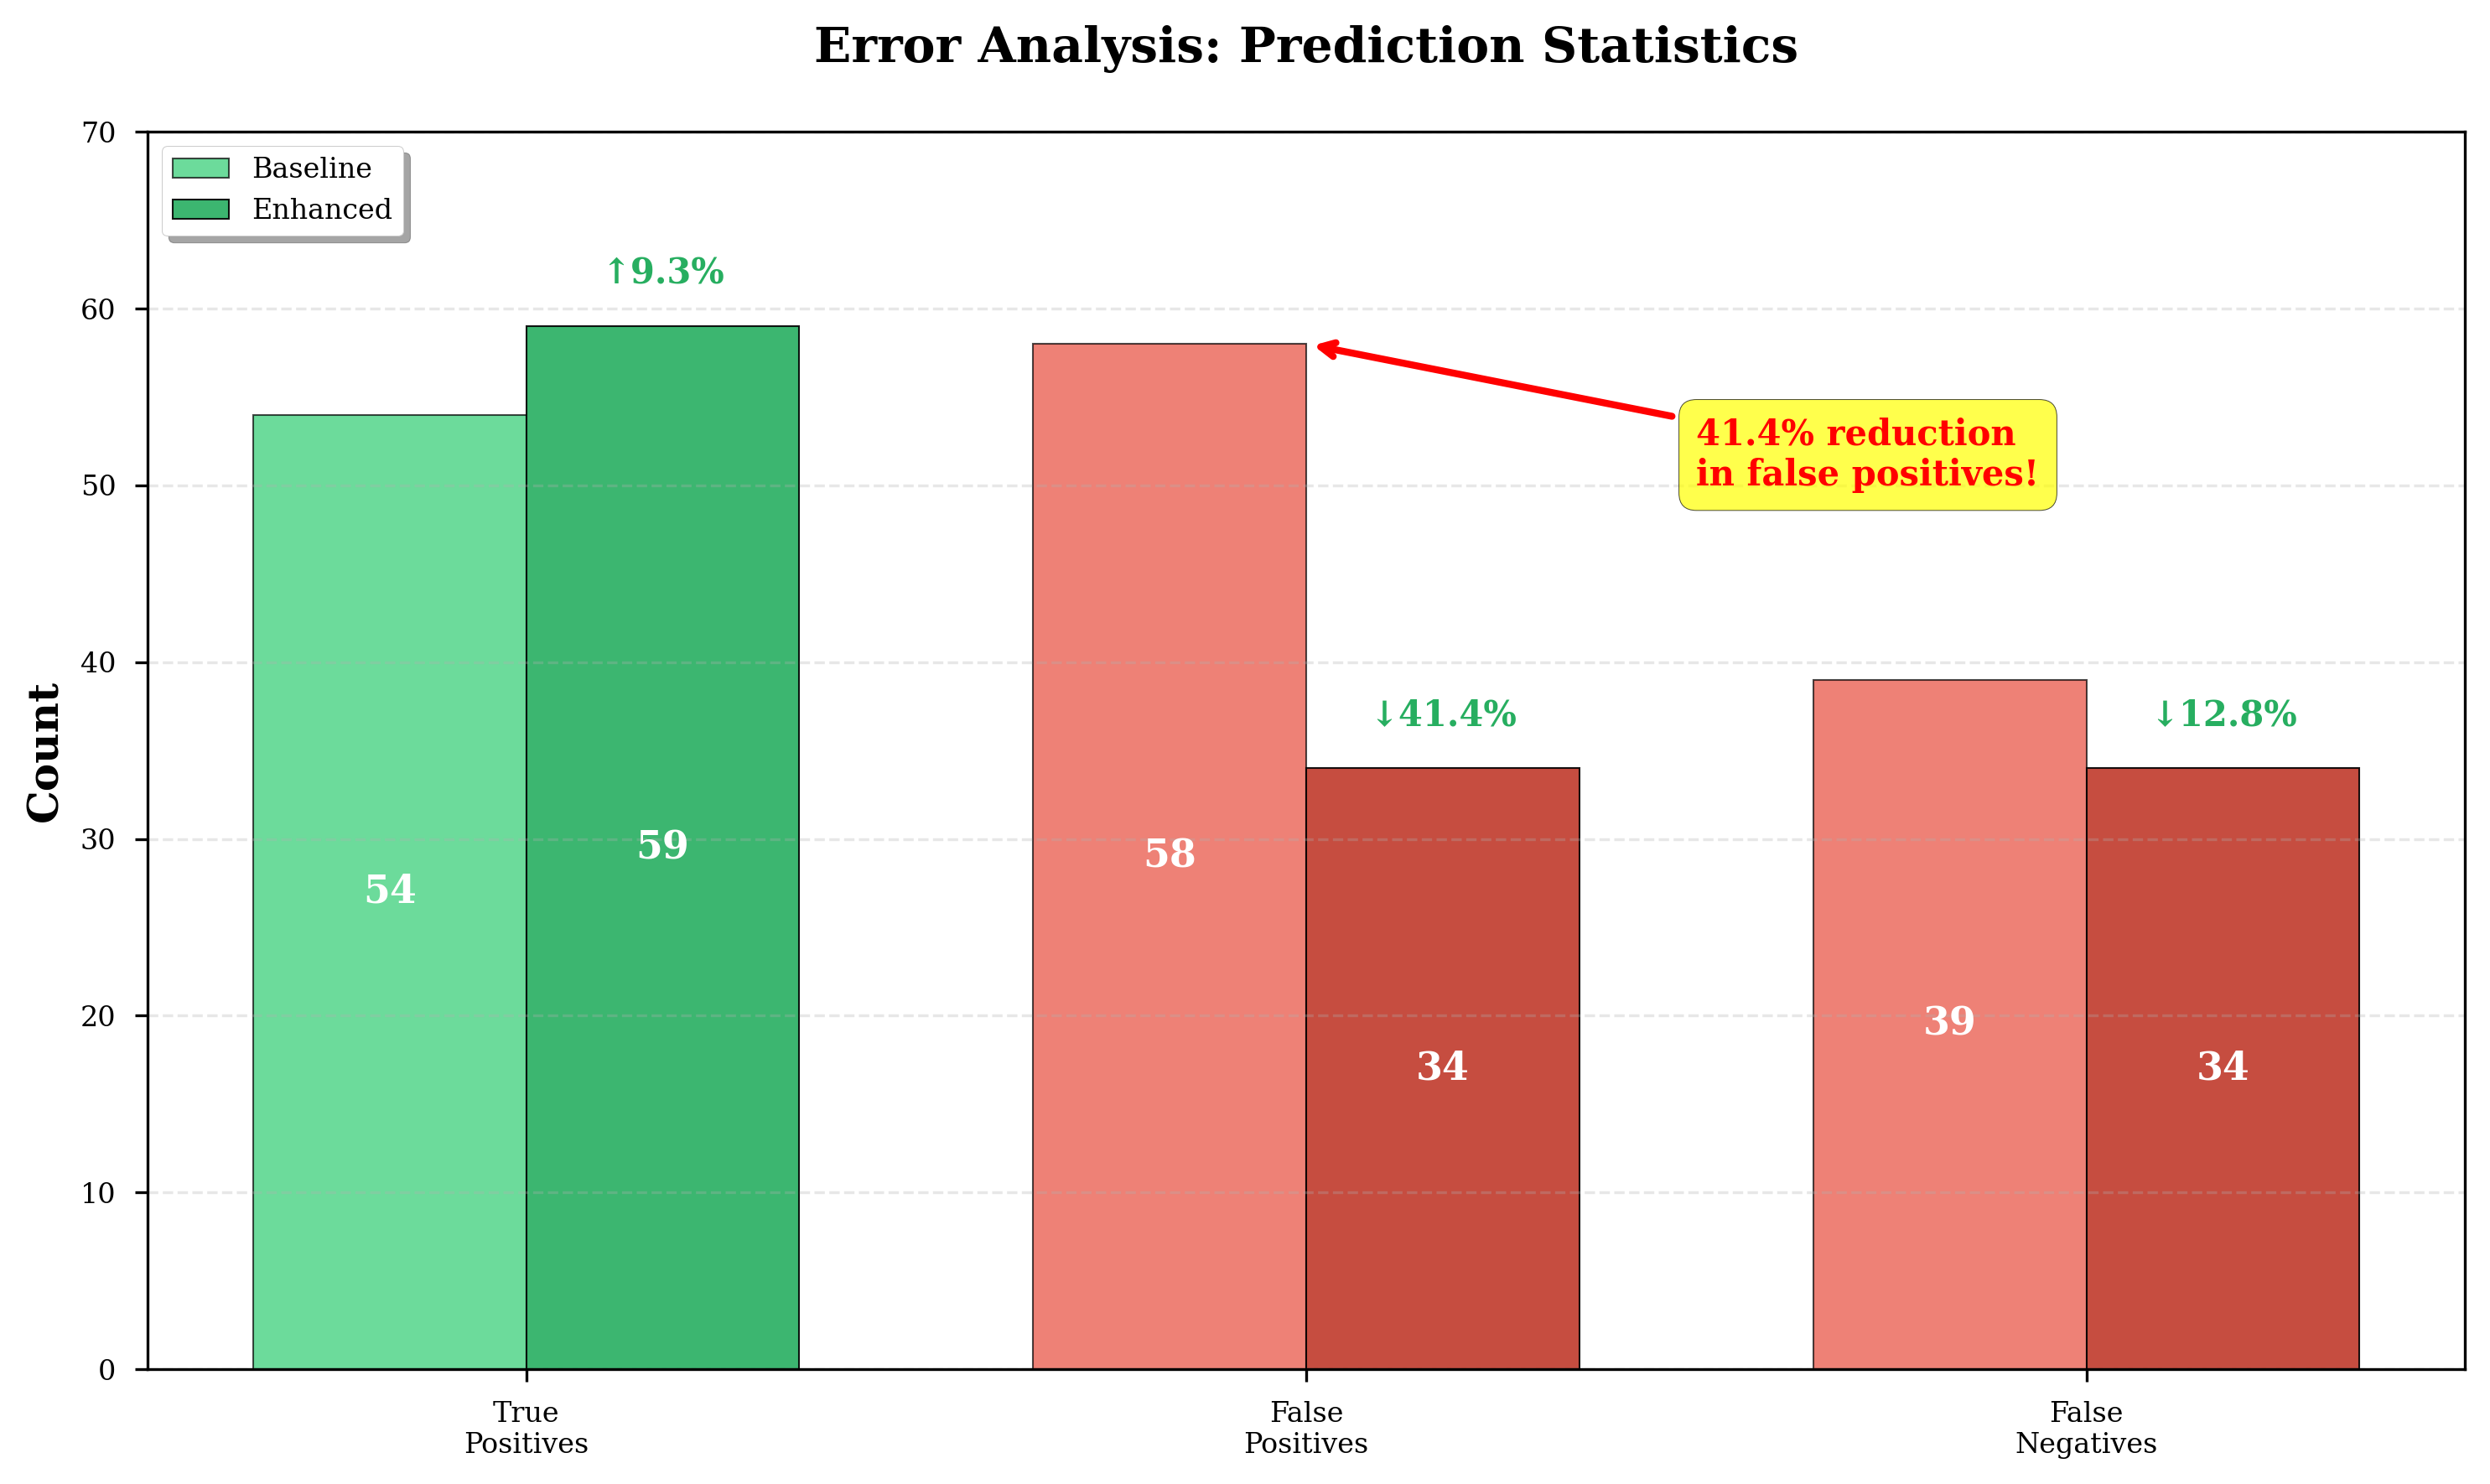


All visualizations saved successfully!
Files saved as both PNG (for viewing) and PDF (for LaTeX inclusion)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style for academic papers - clean and professional
plt.style.use('seaborn-v0_8-paper')
sns.set_palette("husl")

# Configure matplotlib for better-looking figures in papers
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300  # High resolution for publication

# ==============================================================================
# VISUALIZATION 1: Overall Performance Comparison (Main Results)
# ==============================================================================
# This is your most important figure - it shows the key improvements

def plot_overall_performance():
    """
    Creates a grouped bar chart comparing the three methods across four metrics.
    This visualization immediately shows your contribution's impact.
    """
    # Your data from Table 1 in the paper
    methods = ['Baseline', '+CoT', '+Dyn+Vote']

    # Metrics as they appear in your results table
    f1_scores = [0.5539, 0.6222, 0.6656]
    precision = [0.5197, 0.5987, 0.6733]
    recall = [0.6433, 0.6733, 0.6920]
    edit_distance = [0.5217, 0.4650, 0.4033]  # Lower is better

    # Set up the figure with appropriate size for a paper
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the width of each bar and positions
    x = np.arange(len(methods))
    width = 0.2  # Width of each bar

    # Create bars for each metric with distinct colors
    # Using pastel colors that print well in grayscale too
    bars1 = ax.bar(x - 1.5*width, f1_scores, width, label='F1 Score',
                   color='#3498db', edgecolor='black', linewidth=0.5)
    bars2 = ax.bar(x - 0.5*width, precision, width, label='Precision',
                   color='#2ecc71', edgecolor='black', linewidth=0.5)
    bars3 = ax.bar(x + 0.5*width, recall, width, label='Recall',
                   color='#f39c12', edgecolor='black', linewidth=0.5)
    bars4 = ax.bar(x + 1.5*width, edit_distance, width, label='Edit Distance',
                   color='#e74c3c', edgecolor='black', linewidth=0.5)

    # Add value labels on top of each bar for clarity
    # This helps readers see exact numbers without referencing the table
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}',
                   ha='center', va='bottom', fontsize=8)

    add_value_labels(bars1)
    add_value_labels(bars2)
    add_value_labels(bars3)
    add_value_labels(bars4)

    # Customize the plot
    ax.set_xlabel('Method', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax.set_title('Task Planning Performance Comparison on TaskBench',
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.legend(loc='upper left', frameon=True, shadow=True)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 0.8])  # Set appropriate y-axis range

    # Add a horizontal line at 0.5 to show the baseline performance level
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)

    plt.tight_layout()
    plt.savefig('overall_performance.png', dpi=300, bbox_inches='tight')
    plt.savefig('overall_performance.pdf', bbox_inches='tight')  # PDF for LaTeX
    plt.show()

# ==============================================================================
# VISUALIZATION 2: Performance by Task Complexity
# ==============================================================================
# This shows where your method excels - particularly for complex queries

def plot_complexity_performance():
    """
    Shows how performance varies with query complexity.
    Highlights that your improvements are most significant for difficult cases.
    """
    # Data from your complexity analysis table
    complexity_levels = ['1 Task', '2 Tasks', '3 Tasks', '4+ Tasks']
    baseline_scores = [0.941, 0.623, 0.489, 0.356]
    enhanced_scores = [0.975, 0.751, 0.645, 0.589]

    # Calculate improvement percentages for annotation
    improvements = [(e - b) / b * 100 for b, e in zip(baseline_scores, enhanced_scores)]

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.arange(len(complexity_levels))
    width = 0.35

    # Create bars with a color gradient effect to show progression
    bars1 = ax.bar(x - width/2, baseline_scores, width, label='Baseline',
                   color='#95a5a6', edgecolor='black', linewidth=0.5, alpha=0.8)
    bars2 = ax.bar(x + width/2, enhanced_scores, width, label='Enhanced (+Dyn+Vote)',
                   color='#27ae60', edgecolor='black', linewidth=0.5, alpha=0.9)

    # Add improvement percentage annotations above the enhanced bars
    for i, (bar, improvement) in enumerate(zip(bars2, improvements)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
               f'+{improvement:.1f}%',
               ha='center', va='bottom', fontsize=9, fontweight='bold',
               color='#27ae60')

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height - 0.05,
                   f'{height:.3f}',
                   ha='center', va='top', fontsize=8, color='white',
                   fontweight='bold')

    ax.set_xlabel('Query Complexity', fontsize=12, fontweight='bold')
    ax.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
    ax.set_title('Performance vs. Task Complexity',
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(complexity_levels)
    ax.legend(loc='upper right', frameon=True, shadow=True)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 1.1])

    plt.tight_layout()
    plt.savefig('complexity_performance.png', dpi=300, bbox_inches='tight')
    plt.savefig('complexity_performance.pdf', bbox_inches='tight')
    plt.show()

# ==============================================================================
# VISUALIZATION 3: Performance by Task Category
# ==============================================================================
# Demonstrates that improvements are consistent across different domains

def plot_category_performance():
    """
    Shows performance improvements across different task modalities.
    Multimodal tasks show the largest gains, which is a key finding.
    """
    categories = ['Text\n(NLP)', 'Vision', 'Audio', 'Multimodal']
    baseline = [0.682, 0.534, 0.489, 0.501]
    enhanced = [0.751, 0.658, 0.612, 0.678]
    improvements = [10.1, 23.2, 25.2, 35.3]  # Percentage improvements

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Left subplot: Absolute performance comparison
    x = np.arange(len(categories))
    width = 0.35

    bars1 = ax1.bar(x - width/2, baseline, width, label='Baseline',
                    color='#e67e22', edgecolor='black', linewidth=0.5, alpha=0.7)
    bars2 = ax1.bar(x + width/2, enhanced, width, label='Enhanced',
                    color='#16a085', edgecolor='black', linewidth=0.5, alpha=0.9)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=9)

    ax1.set_xlabel('Task Category', fontsize=12, fontweight='bold')
    ax1.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
    ax1.set_title('Performance by Task Category', fontsize=13, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories)
    ax1.legend(loc='upper left', frameon=True, shadow=True)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    ax1.set_ylim([0, 0.85])

    # Right subplot: Relative improvement percentages
    colors = plt.cm.RdYlGn(np.linspace(0.4, 0.8, len(categories)))
    bars = ax2.barh(categories, improvements, color=colors,
                    edgecolor='black', linewidth=0.5)

    # Add percentage labels at the end of each bar
    for i, (bar, val) in enumerate(zip(bars, improvements)):
        width = bar.get_width()
        ax2.text(width + 1, bar.get_y() + bar.get_height()/2.,
                f'+{val:.1f}%',
                ha='left', va='center', fontsize=10, fontweight='bold')

    ax2.set_xlabel('Relative Improvement (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Improvement by Category', fontsize=13, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3, linestyle='--')
    ax2.set_xlim([0, 40])

    plt.tight_layout()
    plt.savefig('category_performance.png', dpi=300, bbox_inches='tight')
    plt.savefig('category_performance.pdf', bbox_inches='tight')
    plt.show()

# ==============================================================================
# VISUALIZATION 4: Ablation Study Results
# ==============================================================================
# Shows the contribution of each component - critical for understanding your work

def plot_ablation_study():
    """
    Demonstrates how each enhancement contributes to the final performance.
    The synergistic effect is clearly visible.
    """
    configurations = ['Baseline', '+CoT\nonly', '+Dynamic\nonly',
                     '+Voting\nonly', '+Dynamic\n+Voting']
    f1_scores = [0.5539, 0.6222, 0.6180, 0.5875, 0.6656]
    improvements = [0, 12.3, 11.6, 6.1, 20.2]

    fig, ax = plt.subplots(figsize=(11, 6))

    # Create bars with color coding: baseline is gray, components are blue,
    # final combination is green to highlight best result
    colors = ['#7f8c8d', '#3498db', '#3498db', '#3498db', '#27ae60']
    bars = ax.bar(configurations, f1_scores, color=colors,
                  edgecolor='black', linewidth=1, alpha=0.85)

    # Make the best performing bar stand out more
    bars[-1].set_linewidth(2)
    bars[-1].set_edgecolor('#27ae60')

    # Add F1 score labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height - 0.03,
               f'{height:.4f}',
               ha='center', va='top', fontsize=9, color='white',
               fontweight='bold')

    # Add improvement percentage above bars
    for i, (bar, imp) in enumerate(zip(bars, improvements)):
        if imp > 0:  # Don't show for baseline
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'+{imp:.1f}%',
                   ha='center', va='bottom', fontsize=9,
                   fontweight='bold', color='#27ae60')

    ax.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
    ax.set_title('Ablation Study: Component Contributions',
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 0.75])

    # Add a text box explaining the synergy
    textstr = 'Synergistic effect:\nCombined > Sum of parts\n(20.2% > 11.6% + 6.1%)'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


    plt.tight_layout()
    plt.savefig('ablation_study.png', dpi=300, bbox_inches='tight')
    plt.savefig('ablation_study.pdf', bbox_inches='tight')
    plt.show()

# ==============================================================================
# VISUALIZATION 5: Error Analysis (Confusion Matrix Style)
# ==============================================================================
# Shows reduction in false positives - your key precision improvement

def plot_error_analysis():
    """
    Visualizes the confusion matrix statistics showing how errors decrease.
    The dramatic reduction in false positives is your biggest win.
    """
    categories = ['True\nPositives', 'False\nPositives', 'False\nNegatives']
    baseline = [54, 58, 39]
    enhanced = [59, 34, 34]

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.arange(len(categories))
    width = 0.35

    # Use red for errors, green for correct predictions
    colors_baseline = ['#2ecc71', '#e74c3c', '#e74c3c']
    colors_enhanced = ['#27ae60', '#c0392b', '#c0392b']

    bars1 = ax.bar(x - width/2, baseline, width, label='Baseline',
                   color=colors_baseline, edgecolor='black', linewidth=0.5,
                   alpha=0.7)
    bars2 = ax.bar(x + width/2, enhanced, width, label='Enhanced',
                   color=colors_enhanced, edgecolor='black', linewidth=0.5,
                   alpha=0.9)

    # Calculate and display percentage changes
    changes = [(e - b) / b * 100 for b, e in zip(baseline, enhanced)]

    for i, (bar, change) in enumerate(zip(bars2, changes)):
        height = bar.get_height()
        color = '#27ae60' if change > 0 else '#e74c3c'
        if i == 0:  # TP increase is good
            symbol = '↑'
        else:  # FP and FN decrease is good
            symbol = '↓'
            color = '#27ae60' if change < 0 else '#e74c3c'

        ax.text(bar.get_x() + bar.get_width()/2., height + 2,
               f'{symbol}{abs(change):.1f}%',
               ha='center', va='bottom', fontsize=10,
               fontweight='bold', color=color)

    # Add count labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                   f'{int(height)}',
                   ha='center', va='center', fontsize=11, color='white',
                   fontweight='bold')

    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_title('Error Analysis: Prediction Statistics',
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend(loc='upper left', frameon=True, shadow=True)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 70])

    # Add annotation highlighting the key finding
    ax.annotate('41.4% reduction\nin false positives!',
                xy=(1, 58), xytext=(1.5, 50),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, fontweight='bold', color='red',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

    plt.tight_layout()
    plt.savefig('error_analysis.png', dpi=300, bbox_inches='tight')
    plt.savefig('error_analysis.pdf', bbox_inches='tight')
    plt.show()

# ==============================================================================
# MAIN EXECUTION
# ==============================================================================

if __name__ == "__main__":
    print("Generating visualizations for paper...")
    print("\n1. Creating overall performance comparison...")
    plot_overall_performance()

    print("\n2. Creating complexity analysis...")
    plot_complexity_performance()

    print("\n3. Creating category performance comparison...")
    plot_category_performance()

    print("\n4. Creating ablation study visualization...")
    plot_ablation_study()

    print("\n5. Creating error analysis...")
    plot_error_analysis()

    print("\nAll visualizations saved successfully!")
    print("Files saved as both PNG (for viewing) and PDF (for LaTeX inclusion)")